# Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Importing The Dataset

In [ ]:
df = pd.read_csv('abalone.data',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Encoding Categorical Data

Encoding column 0 with values F, I, M to 0,1,2

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0])

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Splitting Dataset Into Train And Test Sets

In [ ]:
def train_test_split(data,test_size=0.2,random_state=0):
  """
  Train test split implemented from scratch. Takes the dataset, test_size and random_state 
  as parameters and returns the train and test sets.

  Calculates a random index from the dataset, adds it to the test set and removes it from 
  the dataset. Process continued till test set length is less than test size. 
  """

  random.seed(random_state)
  test = []
  test_size = len(data)*test_size
  train = data.copy()

  while(test_size>len(test)):
    index = random.randrange(len(train))
    test.append(train.iloc[index,:].values)
    train.drop(index,axis=0,inplace=True)
    train.reset_index(drop=True,inplace=True)

  test = pd.DataFrame(test)
  return train,test

In [ ]:
df_train, df_test = train_test_split(df,test_size=0.2)

In [ ]:
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values
y_train = y_train.reshape(len(y_train),1)
X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values
y_test = y_test.reshape(len(y_test),1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3341, 8)
(836, 8)
(3341, 1)
(836, 1)


# Q1

## Linear Regression Class

In [ ]:
class LinearRegression:
  """
  Linear Regression Implemented from scratch using gradient descent algorithm

  For Training 
   1.We iterate over the training dataset and for each iteration we find the 
      y_predicted value using the dot product of x and theta and adding the 
      constant term. 
   2. We then find the gradients of theta and the bias terms and update the 
      values of theta and bias for each iteration.

  For Prediction
  We do a dot product of testing dataset X and theta and add the bias term to 
  it to predict the y values. 

  """
  def __init__(self,limit,alpha):
    self.limit = limit
    self.alpha = alpha
    self.constant = 0

  def gradient_descent(self,x,y):
    m = len(y)
    self.theta = np.zeros((x.shape[1],1))

    for i in range(self.limit):
      y_predicted = np.dot(x,self.theta)+self.constant
      self.constant = self.constant - self.alpha*self.gradient_c(y,y_predicted,m)
      self.theta = self.theta - self.alpha*self.gradient_m(x,y,y_predicted,m)
  
  def gradient_m(self,x,y_true,y_predicted,m):
    return np.dot(x.T,y_predicted-y_true)*2/m

  def gradient_c(self,y_true,y_predicted,m):
    return np.sum(y_predicted-y_true)*2/m
  
  def root_mean_square_error(self,y_true, y_predicted):
    return math.sqrt(sum(np.square(y_true-y_predicted))/len(y_true))

  def predict(self,X_test):
    return np.dot(X_test, self.theta)+self.constant

## Performing Linear Regression

In [ ]:
linear_regression = LinearRegression(40000,0.1)
linear_regression.gradient_descent(X_train,y_train)

## RMSE On Training and Testing Data

In [ ]:
y_predicted_test = linear_regression.predict(X_test)
y_predicted_train = linear_regression.predict(X_train)
print("Root Mean Squared Error")
print("Train ",linear_regression.root_mean_square_error(y_train,y_predicted_train))
print("Test ",linear_regression.root_mean_square_error(y_test,y_predicted_test))

Root Mean Squared Error
Train  2.1917792438562023
Test  2.3550307203907757


# Q2

## A

In [ ]:
def root_mean_squared_error(y_true, y_predicted):
    return math.sqrt(sum(np.square(y_true-y_predicted))/len(y_true))

In [ ]:
ridge_errors = []
alpha = np.linspace(1e-5,10,500)
best_estimator_ridge = {'alpha':0,'rmse':math.inf}
best_estimator_lasso = {'alpha':0,'rmse':math.inf}

for val in alpha:
  ridge_reg = Ridge(alpha=val)
  ridge_reg.fit(X_train,y_train)
  y_pred_ridge = ridge_reg.predict(X_test)
  ridge_errors.append(root_mean_squared_error(y_test,y_pred_ridge))
  if(ridge_errors[-1]<best_estimator_ridge['rmse']):
    best_estimator_ridge['rmse'] = ridge_errors[-1]
    best_estimator_ridge['alpha'] = val
    best_estimator_ridge['coeff'] = ridge_reg.coef_
  ridge_reg = None

lasso_errors = []
for val in alpha:
  lasso_reg = Lasso(alpha=val)
  lasso_reg.fit(X_train,y_train)
  y_pred_lasso = lasso_reg.predict(X_test)
  y_pred_lasso = y_pred_lasso.reshape(len(y_pred_lasso),1)
  lasso_errors.append(root_mean_squared_error(y_test,y_pred_lasso))
  if(lasso_errors[-1]<best_estimator_lasso['rmse']):
    best_estimator_lasso['rmse'] = lasso_errors[-1]
    best_estimator_lasso['alpha'] = val
    best_estimator_lasso['coeff'] = lasso_reg.coef_
  lasso_reg = None

In [ ]:
best_estimator_ridge

{'alpha': 1.282573847695391,
 'coeff': array([[  0.05188745,   2.7531959 ,   6.80260005,  10.78568595,
           6.44183854, -16.43319683,  -5.3326316 ,  10.16730724]]),
 'rmse': 2.3009253750557725}

In [ ]:
best_estimator_lasso

{'alpha': 1e-05,
 'coeff': array([  0.05912666,  -1.42729057,  10.68826337,  23.7601288 ,
          8.7365166 , -19.24686393, -10.02253708,   7.49497595]),
 'rmse': 2.3866406862721976}

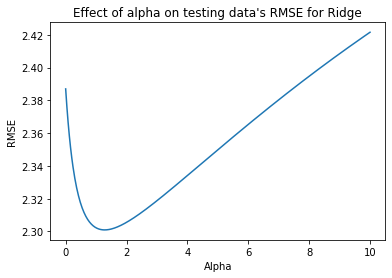

In [ ]:
plt.plot(alpha,ridge_errors)
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Effect of alpha on testing data's RMSE for Ridge")
plt.show()

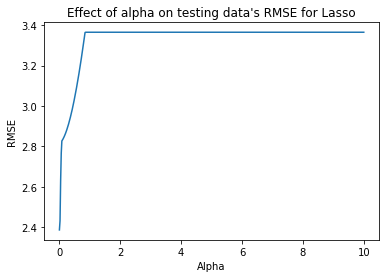

In [ ]:
plt.plot(alpha,lasso_errors)
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Effect of alpha on testing data's RMSE for Lasso")
plt.show()

## B

In [ ]:
param_grid = dict(alpha=alpha)

In [ ]:
grid_search_ridge = GridSearchCV(estimator=Ridge(),param_grid=param_grid,scoring='neg_root_mean_squared_error')
grid_result_ridge = grid_search_ridge.fit(X_train,y_train)
print("Best Negative RMSE: ",grid_result_ridge.best_score_)
print("Best Alpha: ",grid_result_ridge.best_params_)
print("Best Model Coefficients: ",grid_result_ridge.best_estimator_.coef_)

Best Negative RMSE:  -2.236280173646031
Best Alpha:  {'alpha': 0.12025036072144289}
Best Model Coefficients:  [[  0.05876589  -0.42352831   9.82225519  21.11722349   8.37414862
  -18.89306024  -9.27050044   8.09695838]]


In [ ]:
grid_search_lasso = GridSearchCV(estimator=Lasso(),param_grid=param_grid,scoring='neg_root_mean_squared_error')
grid_result_lasso = grid_search_lasso.fit(X_train,y_train)
print('Best Negative RMSE: ', grid_result_lasso.best_score_)
print('Best Alpha: ', grid_result_lasso.best_params_)
print("Best Model Coefficients: ",grid_result_ridge.best_estimator_.coef_)

Best Negative RMSE:  -2.237444565893175
Best Alpha:  {'alpha': 1e-05}
Best Model Coefficients:  [[  0.05876589  -0.42352831   9.82225519  21.11722349   8.37414862
  -18.89306024  -9.27050044   8.09695838]]
